In [53]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16


# initial condition shape
def rho_red_light(nx, rho_max, rho_in):
    """Computes "red light" initial condition with shock

    Parameters
    ----------
    nx        : int
        Number of grid points in x
    rho_max   : float
        Maximum allowed car density
    rho_in    : float
        Density of incoming cars 

    Returns
    -------
    rho: array of floats
        Array with initial values of density
    """
    rho = rho_max*numpy.ones(nx)
    rho[:(nx-1)*3./4.] = rho_in
    return rho





# flux function

def computeF(u_max, rho_max, rho):
    """Computes flux F=V*rho

    Parameters
    ----------
    u_max  : float
        Maximum allowed velocity
    rho    : array of floats
        Array with density of cars at every point x
    rho_max: float
        Maximum allowed car density
        
    Returns
    -------
    F : array
        Array with flux at every point x
    """
    return u_max*rho*(1-rho/rho_max)

# calculate the first step with Runge-Kutta method
# introduce the Runge-Kutta method
# forward time/center space
def ftcs(rho, nt, dt, dx, rho_max, u_max):
    """ Computes the solution with forward in time, center in space
    
    Parameters
    ----------
    rho    : array of floats
            Density at current time-step
    nt     : int
            Number of time steps
    dt     : float
            Time-step size
    dx     : float
            Mesh spacing
    rho_max: float
            Maximum allowed car density
    u_max  : float
            Speed limit
    
    Returns
    -------
    rho_n : array of floats
            Density after nt time steps at every point x
    """
    
    #initialize our results array with dimensions nt by nx
    rho_n = numpy.zeros((nt,len(rho)))      
    #copy the initial u array into each row of our new array
    rho_n[0,:] = rho.copy()              
    
    for t in range(1,nt):
        F = computeF(u_max, rho_max, rho)
        # kickoff with Runge Kutta        
        rho_n_star = rho[:2] - 0.5*dt/dx*(F[1:3] - F[0:2])
        F_star  = computeF(u_max,rho_max, rho_n_star )
        rho_n[t,1] = rho[0]- 1.*dt/dx*(F_star[1] - F_star[0])
        # middle point
        rho_n[t,1:-1] = rho[1:-1] - 0.5*dt/dx*(F[2:]-F[:-2])
        rho_n[t,0] = rho[0]
        rho_n[t,-1] = rho[-1]
        rho = rho_n[t].copy()

    return rho_n

# forward time/center space
def LF_ftcs(rho, nt, dt, dx, rho_max, u_max):
    """ Computes the solution with forward in time, center in space
    
    Parameters
    ----------
    rho    : array of floats
            Density at current time-step
    nt     : int
            Number of time steps
    dt     : float
            Time-step size
    dx     : float
            Mesh spacing
    rho_max: float
            Maximum allowed car density
    u_max  : float
            Speed limit
    
    Returns
    -------
    rho_n : array of floats
            Density after nt time steps at every point x
    """
    
    #initialize our results array with dimensions nt by nx
    rho_n = numpy.zeros((nt,len(rho)))      
    #copy the initial u array into each row of our new array
    rho_n[0,:] = rho.copy()              
    
    for t in range(1,nt):
        F = computeF(u_max, rho_max, rho)
        # kickoff with Runge Kutta        
        rho_n_star = rho[:2] - 0.5*dt/dx*(F[1:3] - F[0:2])
        F_star  = computeF(u_max,rho_max, rho_n_star )
        rho_n[t,1] = rho[0]- 1.*dt/dx*(F_star[1] - F_star[0])
        # middle point
        rho_n[t,1:-1] = 0.5*(rho[2:] + rho[:-2]) - 0.5*dt/dx*(F[2:]-F[:-2])
        rho_n[t,0] = rho[0]
        rho_n[t,-1] = rho[-1]
        rho = rho_n[t].copy()

    return rho_n

In [28]:
    #initialize our results array with dimensions nt by nx
rho_n = numpy.zeros((nt,len(rho)))      
    #copy the initial u array into each row of our new array
rho_n[0,:] = rho.copy()     

F = computeF(u_max, rho_max, rho)
rho_n_star = rho[:2] - 0.5*dt/dx*(F[1:3] - F[0:2])
F_star  = computeF(u_max,rho_max, rho_n_star )
rho_n[1,1] = rho[0]- 1.*dt/dx*(F_star[1] - F_star[0])

rho_n[1,2:] = rho[2:] - 0.5*dt/dx*(F[2:]-F[:-2])
rho_n[1,0] = rho[0]
rho_n[1,-1] = rho[-1]

In [46]:
rho_n[0,1:-1]

array([  5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,
         5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,
         5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,
         5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,
         5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,
         5.,   5.,   5.,   5.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.])

In [60]:
#Basic initial condition parameters
#defining grid size, time steps, CFL condition, etc...
nx = 81
nt = 30
dx = 4.0/(nx-1)

rho_in = 5.
rho_max = 10.

u_max = 1.

x = numpy.linspace(0,4,nx)

#rho = rho_red_light(nx, rho_max, rho_in)

sigma = 0.5
dt = sigma*dx/u_max

rho = rho_red_light(nx, rho_max, rho_in)      #make sure that u is set to our expected initial conditions
rho_n = LF_ftcs(rho, nt, dt, dx, rho_max, u_max)
#rho_n = laxfriedrichs(rho, nt, dt, dx, rho_max, u_max)

In [49]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,


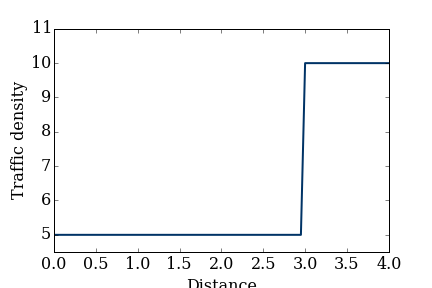
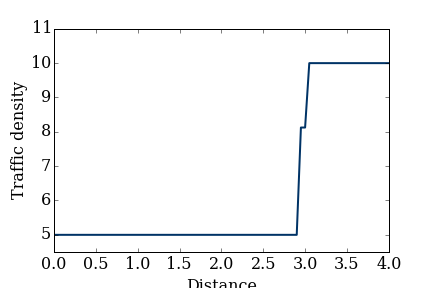
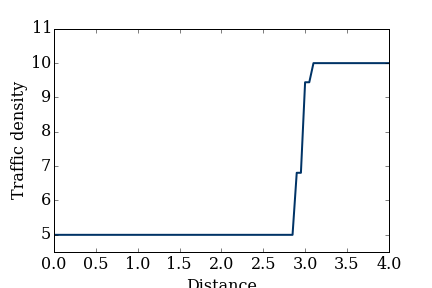
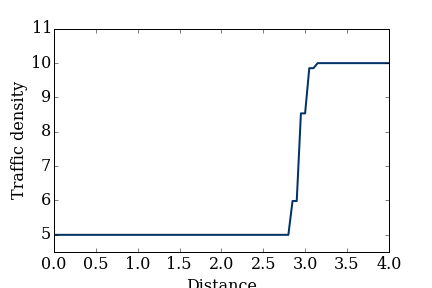
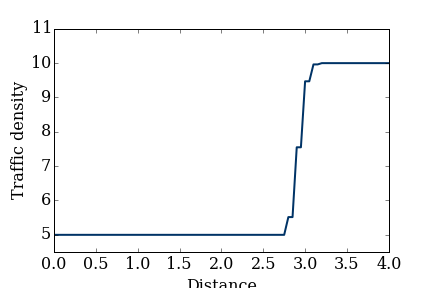
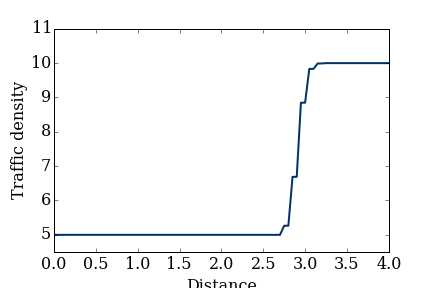
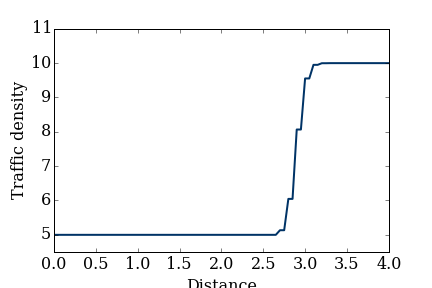
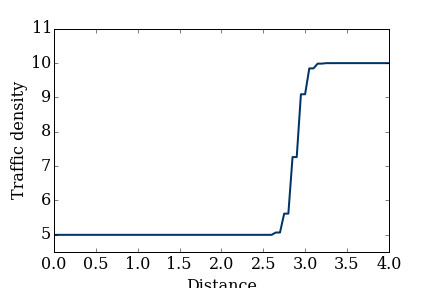
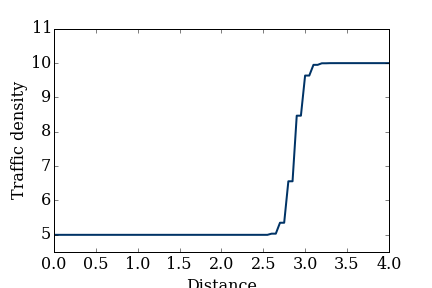
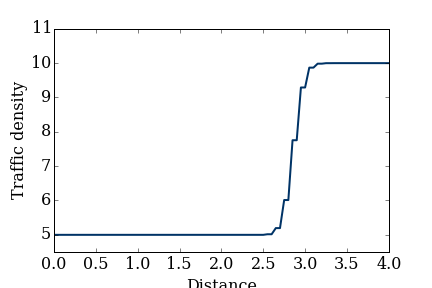
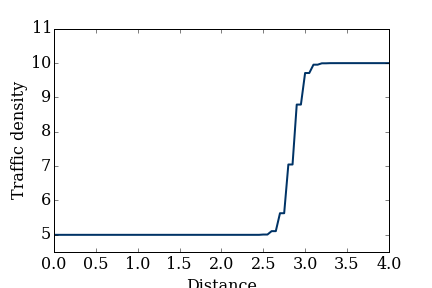
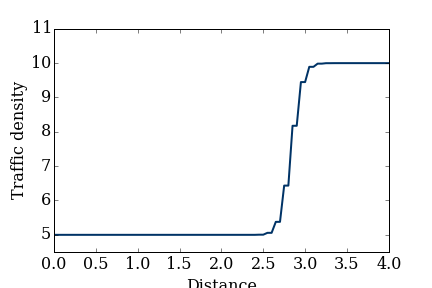
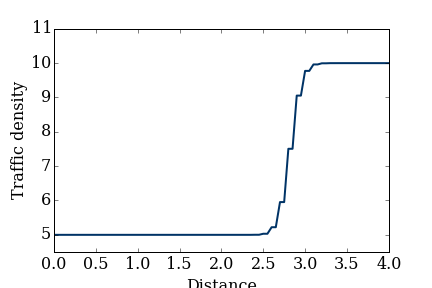
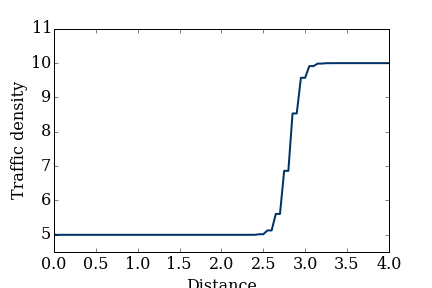
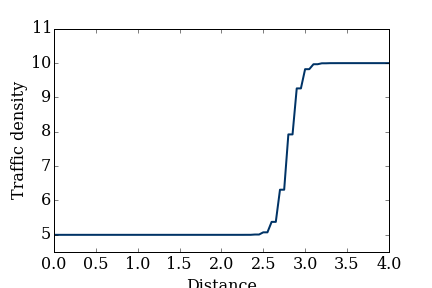
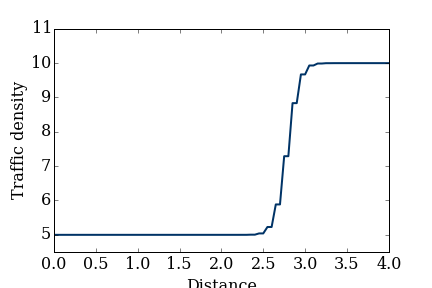
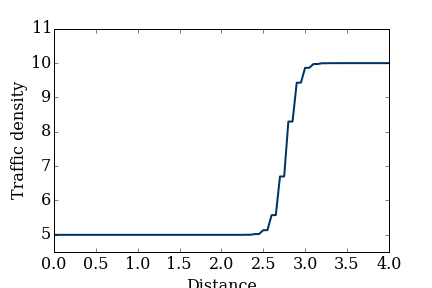
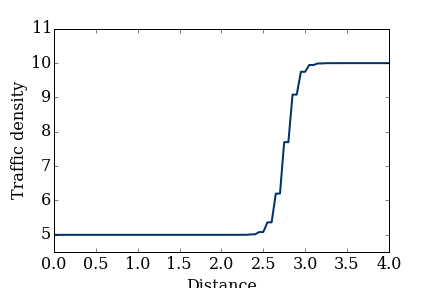
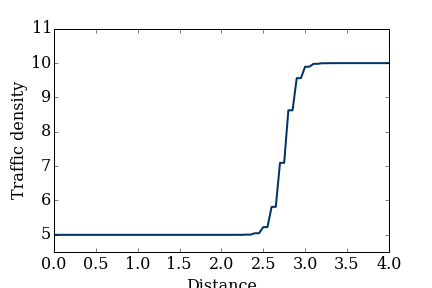
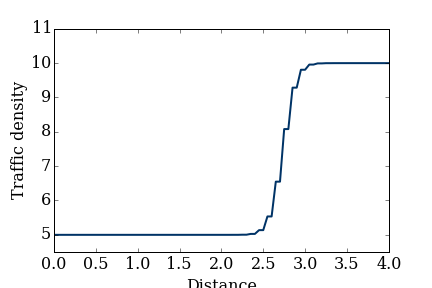
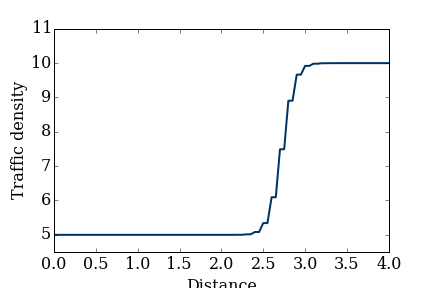
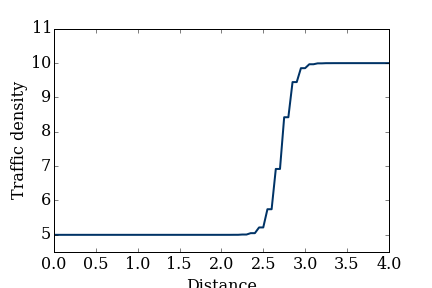
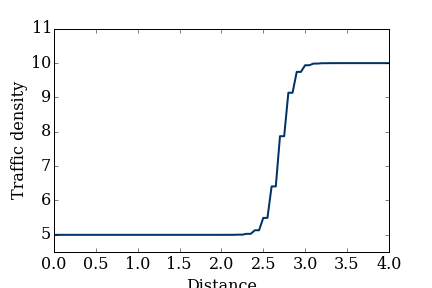
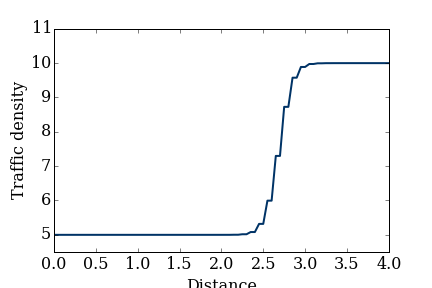
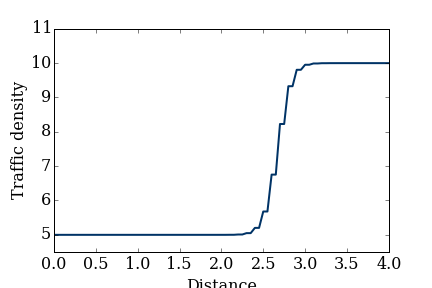
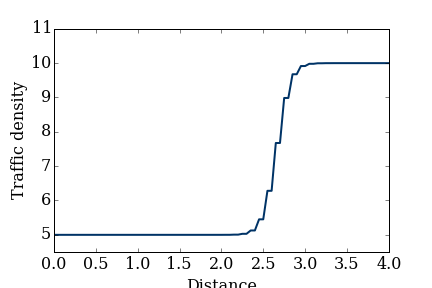
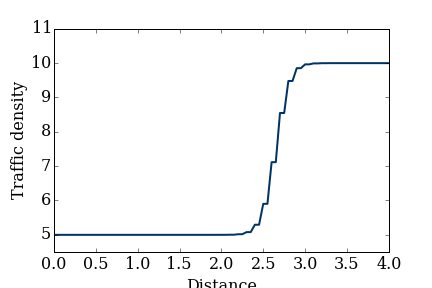
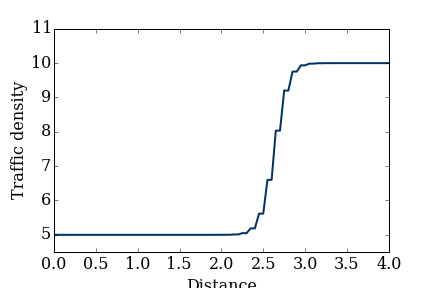
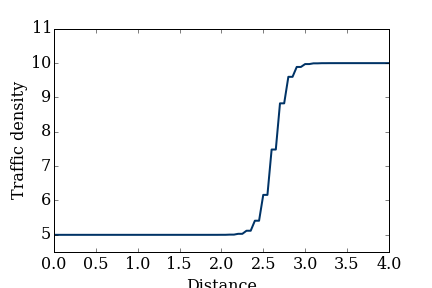
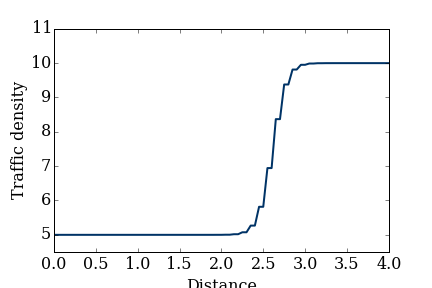

In [61]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(4.5,11),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
display_animation(anim, default_mode='once')